In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

C:\Users\mistr184\AppData\Local\Temp\ipykernel_7568\4196587217.py:4: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect=True)


In [6]:
Base.classes.keys()

['station', 'measurement']

In [7]:
# Map the classes to variables
Measurement = Base.classes.measurement
Station = Base.classes.station

# Create a session to link Python to the database
session = Session(engine)

In [8]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [12]:
# Find the most recent date in the data set.
most_recent_date = session.query(func.max(Measurement.date)).first()
most_recent_date

('2017-08-23',)

Text(0, 0.5, 'Inches')


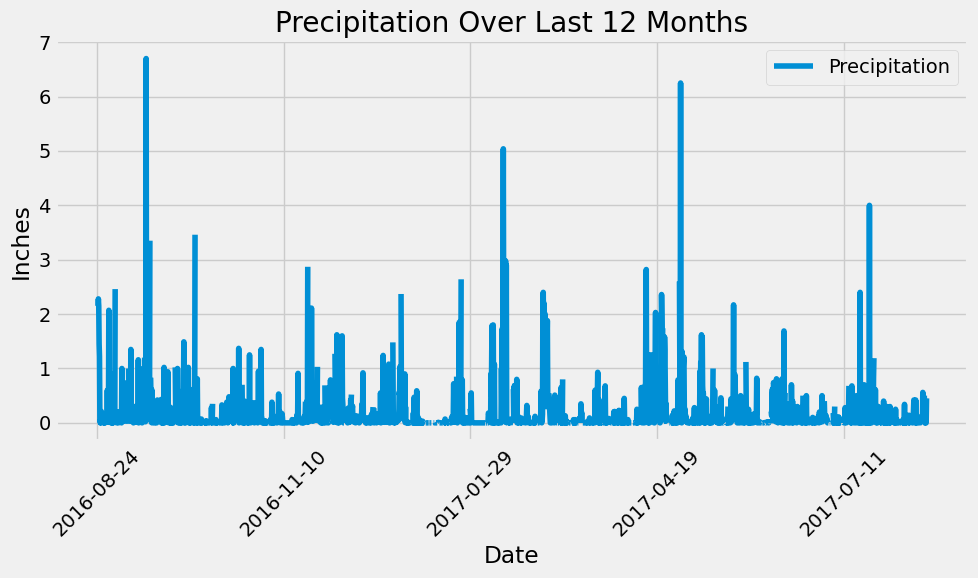

In [16]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Find the most recent date in the Measurement table
most_recent_date = session.query(func.max(Measurement.date)).first()
most_recent_date = most_recent_date[0]

# Calculate the date one year from the last date in the data set
one_year_ago = dt.datetime.strptime(most_recent_date, '%Y-%m-%d') - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
precipitation_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= one_year_ago).all()

# Save the query results as a Pandas DataFrame and explicitly set the column names
precipitation_df = pd.DataFrame(precipitation_data, columns=['Date', 'Precipitation'])

# Sort the DataFrame by date
precipitation_df = precipitation_df.sort_values(by='Date')

# Use Pandas Plotting with Matplotlib to plot the data
precipitation_df.set_index('Date', inplace=True)
ax = precipitation_df.plot(figsize=(10,6), title="Precipitation Over Last 12 Months", xlabel='Date')
ylabel_text = ax.set_ylabel('Inches')

# Print the ylabel text object
print(ylabel_text)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [18]:
# Calculate the summary statistics for the precipitation data
precipitation_summary_df = precipitation_df['Precipitation'].describe().to_frame()

# Rename the column for clarity
precipitation_summary_df.columns = ['Precipitation']

precipitation_summary_df


,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [19]:
# Design a query to calculate the total number of stations in the dataset

total_stations = session.query(func.count(Station.station)).all()

# Print the result
total_stations


[(9,)]

In [21]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
                    group_by(Measurement.station).\
                    order_by(func.count(Measurement.station).desc()).all()

# Print the result
active_stations


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [22]:

# Define the station id for the most active station
most_active_station = 'USC00519281'

# Query to calculate the lowest, highest, and average temperature for the most active station
temperature_stats = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
                    filter(Measurement.station == most_active_station).all()

# Print the result
temperature_stats


[(54.0, 85.0, 71.66378066378067)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


[(54.0, 85.0, 71.66378066378067)]

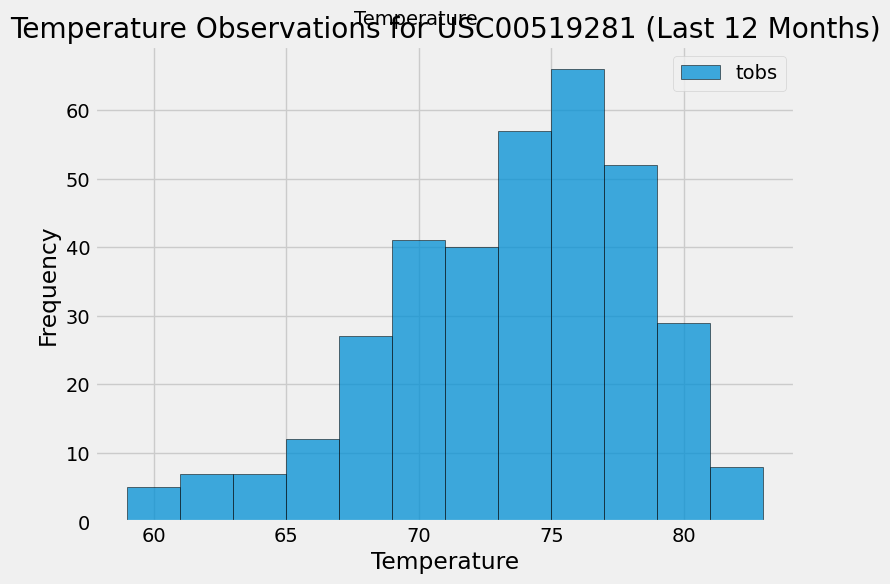

In [25]:


# Calculate the date one year from the most recent date in the dataset
most_recent_date = session.query(func.max(Measurement.date)).scalar()
most_recent_date = dt.datetime.strptime(most_recent_date, '%Y-%m-%d')
one_year_ago = most_recent_date - dt.timedelta(days=365)

# Query the temperature observations for the last 12 months for the most active station
temperature_data = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date >= one_year_ago).all()

# Save the query results as a Pandas DataFrame and explicitly set the column names
temperature_df = pd.DataFrame(temperature_data, columns=['Date', 'Temperature'])

# Plot the histogram
plt.figure(figsize=(8, 6))
plt.hist(temperature_df['Temperature'], bins=12, alpha=0.75, edgecolor='black', label='tobs')

plt.title('Temperature Observations for USC00519281 (Last 12 Months)')
plt.xlabel('Temperature')
plt.ylabel('Frequency')

plt.legend()

plt.figtext(0.5, 0.96, 'Temperature', ha='center', va='center')

plt.tight_layout()
plt.show()




Text(0.5, 4.183333333333314, 'Temperature')

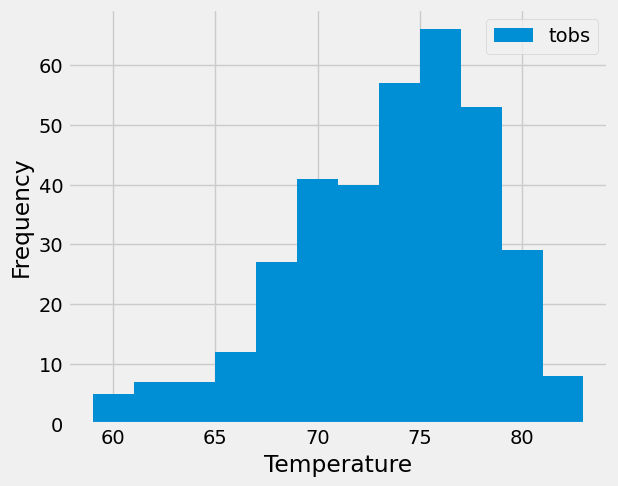

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [26]:
# Close Session
session.close()